**Independent variables**

1. age : age of policyholder
2. sex: gender of policy holder (female=0, male=1)
3. bmi: Body mass index, ideally 18.5 to 25
4. children: number of children / dependents of policyholder
5. smoker: smoking state of policyholder (non-smoke=0;smoker=1) 
6. region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
7. charges: individual medical costs billed by health insurance

**Target variable**

1. insuranceclaim - categorical variable (0,1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [2]:
insuranceDF = pd.read_csv('insurance2.csv')
print(insuranceDF.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


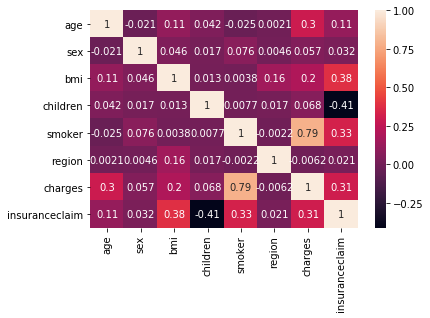

In [3]:
corr = insuranceDF.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})

In [4]:
insuranceDF.shape

(1338, 8)

In [5]:
dfTrain = insuranceDF[:1000]
dfTest = insuranceDF[1000:1338]

In [6]:
trainLabel = np.asarray(dfTrain['insuranceclaim']) # y_train
trainData = np.asarray(dfTrain.drop('insuranceclaim',1)) # x_train
testLabel = np.asarray(dfTest['insuranceclaim']) # y_test
testData = np.asarray(dfTest.drop('insuranceclaim',1)) # X_test

In [7]:
print (trainData[:5])
print (testData[:5])

[[1.90000000e+01 0.00000000e+00 2.79000000e+01 0.00000000e+00
  1.00000000e+00 3.00000000e+00 1.68849240e+04]
 [1.80000000e+01 1.00000000e+00 3.37700000e+01 1.00000000e+00
  0.00000000e+00 2.00000000e+00 1.72555230e+03]
 [2.80000000e+01 1.00000000e+00 3.30000000e+01 3.00000000e+00
  0.00000000e+00 2.00000000e+00 4.44946200e+03]
 [3.30000000e+01 1.00000000e+00 2.27050000e+01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 2.19844706e+04]
 [3.20000000e+01 1.00000000e+00 2.88800000e+01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 3.86685520e+03]]
[[3.00000000e+01 1.00000000e+00 2.29900000e+01 2.00000000e+00
  1.00000000e+00 1.00000000e+00 1.73617661e+04]
 [2.40000000e+01 1.00000000e+00 3.27000000e+01 0.00000000e+00
  1.00000000e+00 3.00000000e+00 3.44728410e+04]
 [2.40000000e+01 1.00000000e+00 2.58000000e+01 0.00000000e+00
  0.00000000e+00 3.00000000e+00 1.97295000e+03]
 [4.80000000e+01 1.00000000e+00 2.96000000e+01 0.00000000e+00
  0.00000000e+00 3.00000000e+00 2.12321823e+04]
 [4.70000

Before using machine learning,normalize your inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier to understand the importance of each feature later, when looking at the model weights. Normalize the data such that each variable has 0 mean and standard deviation of 1.

In [8]:
# Standardization - making Standard Normal - mean = 0 and stddev = 1

means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [9]:
print (trainData[:5])
print (testData[:5])

[[-1.457217   -1.0100505  -0.49026738 -0.90137816  2.02534955  1.33448391
   0.31796247]
 [-1.52790422  0.9900495   0.48087689 -0.06676875 -0.49374193  0.43341442
  -0.94743488]
 [-0.82103204  0.9900495   0.35348659  1.60245006 -0.49374193  0.43341442
  -0.72006212]
 [-0.46759595  0.9900495  -1.34973834 -0.90137816 -0.49374193 -0.46765506
   0.74363662]
 [-0.53828317  0.9900495  -0.32813426 -0.90137816 -0.49374193 -0.46765506
  -0.76869403]]
[[-0.6796576   0.9900495  -1.30258738  0.76784065  2.02534955 -0.46765506
   0.35776588]
 [-1.10378091  0.9900495   0.303854   -0.90137816  2.02534955  1.33448391
   1.78607763]
 [-1.10378091  0.9900495  -0.83769549 -0.90137816 -0.49374193  1.33448391
  -0.92678386]
 [ 0.59271233  0.9900495  -0.20901606 -0.90137816 -0.49374193  1.33448391
   0.6808409 ]
 [ 0.52202511  0.9900495  -1.93126681 -0.06676875 -0.49374193 -1.36872455
  -0.37130557]]


In [11]:
insuranceCheck = LogisticRegression()
insuranceCheck.fit(trainData, trainLabel)

print (insuranceCheck.intercept_)
print (insuranceCheck.coef_)
print (insuranceDF.columns)

# pair the feature names with the coefficients
# list(zip(insuranceDF.columns, insuranceCheck.coef_))

[0.84966805]
[[ 0.38067082  0.0341256   1.61695079 -1.82655752  1.55957318 -0.05394392
   0.17220628]]
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')


To get a better sense of what is going on inside the logistic regression model, visualize how your model uses the different features and which features have greater effect.

Text(0.5,0,'Importance')

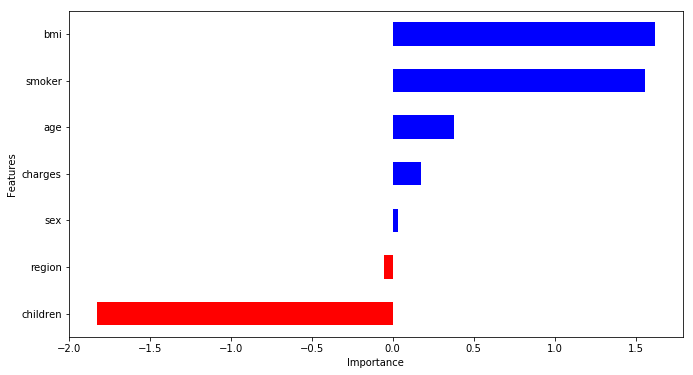

In [12]:
coeff = list(insuranceCheck.coef_[0])
labels = list(dfTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
0.38067082  0.0341256   1.61695079 -1.82655752  1.55957318   -0.05394392   0.17220628]]
([   'age',      'sex',      'bmi',    'children',   'smoker',    'region',    'charges']]


In [16]:
log_odds_0 = 0.84966805 + 39*0.38067082 + 1*0.0341256 + 30*1.61695079 - 0*1.82655752 + 1*1.55957318 - 1*0.05394392 + 9382*0.17220628
log_odds_1 = 0.84966805 + 39*0.38067082 + 1*0.0341256 + 30*1.61695079 - 1*1.82655752 + 1*1.55957318 - 1*0.05394392 + 9382*0.17220628
log_odds_2 = 0.84966805 + 39*0.38067082 + 1*0.0341256 + 30*1.61695079 - 2*1.82655752 + 1*1.55957318 - 1*0.05394392 + 9382*0.17220628
log_odds_3 = 0.84966805 + 39*0.38067082 + 1*0.0341256 + 30*1.61695079 - 3*1.82655752 + 1*1.55957318 - 1*0.05394392 + 9382*0.17220628
log_odds_4 = 0.84966805 + 39*0.38067082 + 1*0.0341256 + 30*1.61695079 - 4*1.82655752 + 1*1.55957318 - 1*0.05394392 + 9382*0.17220628
log_odds_5 = 0.84966805 + 39*0.38067082 + 1*0.0341256 + 30*1.61695079 - 5*1.82655752 + 1*1.55957318 - 1*0.05394392 + 9382*0.17220628

print (log_odds_0)
print (log_odds_1)
print (log_odds_2)
print (log_odds_3)
print (log_odds_4)
print (log_odds_5)


1681.3834275499999
1679.5568700299998
1677.7303125099997
1675.90375499
1674.0771974699999
1672.2506399499998


In [17]:
#smoker

log_odds_0 = 0.84966805 + 39*0.38067082 + 1*0.0341256 + 30*1.61695079 - 1*1.82655752 + 0*1.55957318 - 1*0.05394392 + 9382*0.17220628
log_odds_1 = 0.84966805 + 39*0.38067082 + 1*0.0341256 + 30*1.61695079 - 1*1.82655752 + 1*1.55957318 - 1*0.05394392 + 9382*0.17220628

print (log_odds_0)
print (log_odds_1)

1677.9972968499999
1679.5568700299998


In [13]:
insuranceDF.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


From the above figure, 

1. BMI, Smoker have significant influence on the model, specially BMI. 

2. Children have a negative influence on the prediction, i.e. higher number children / dependents are correlated with a policy holder who has not taken insurance claim.